# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

於啟動期間 - 警告訊息：
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [3]:
%%R

require('tidyverse')
require('ggbeeswarm')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


載入需要的套件：tidyverse
載入需要的套件：ggbeeswarm


### Read data

In [4]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


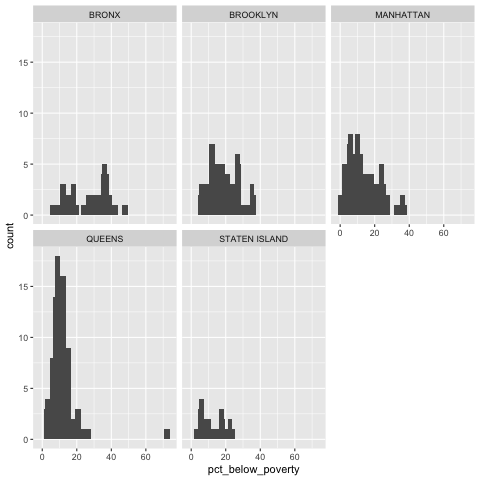

In [28]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() +
    facet_wrap(~ borough) +
    stat_bin(binwidth=3)

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

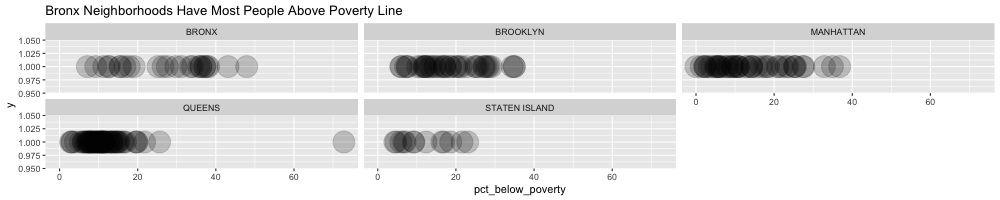

In [31]:
%%R -w 1000 -h 200

ggplot(df) +
aes(x=pct_below_poverty, y=1) +
geom_point(alpha=.2, size=10) +
facet_wrap(~ borough) +
labs(title = 'Bronx Neighborhoods Have Most People Above Poverty Line')

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

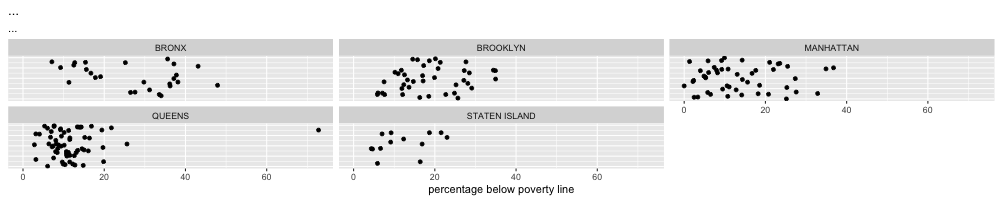

In [15]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter() +
    facet_wrap(~ borough) +
        labs(title = '...', 
             subtitle='...',
            x= 'percentage below poverty line',
            y=NULL)+
    theme(axis.text.y = element_blank(),  # Hide y-axis labels
        axis.ticks.y = element_blank())  # Hide y-axis ticks

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


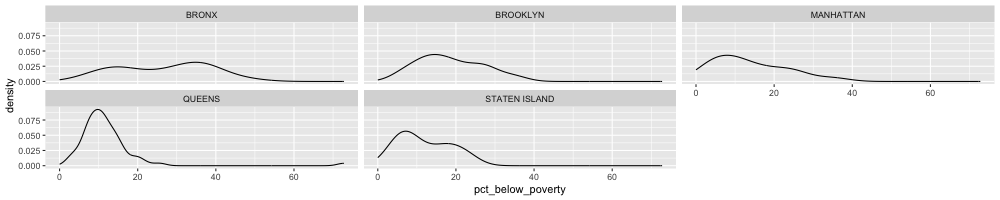

In [16]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density() +
    facet_wrap(~ borough)

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


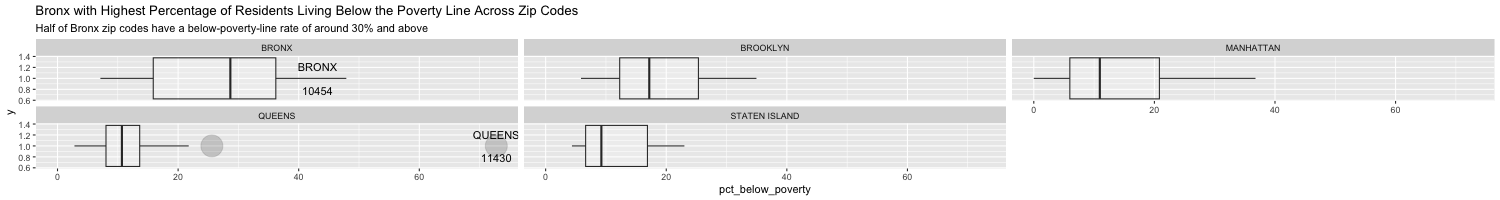

In [38]:
%%R -w 1500 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    facet_wrap(~ borough) +
    labs(title='Bronx with Highest Percentage of Residents Living Below the Poverty Line Across Zip Codes',
        subtitle='Half of Bronx zip codes have a below-poverty-line rate of around 30% and above')+
    geom_text(aes(label=zip), 
              data=subset(df, pct_below_poverty %in% boxplot.stats(df$pct_below_poverty)$out),
              vjust=2, 
              check_overlap = TRUE)+
     geom_text(aes(label=borough), 
              data=subset(df, pct_below_poverty %in% boxplot.stats(df$pct_below_poverty)$out),
              vjust=-1, 
              check_overlap = TRUE)

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> for the box and whisker plot outliers are plotted as dots separately; while in the violin chart it shows the range so you see how wide the distribution is for each borough



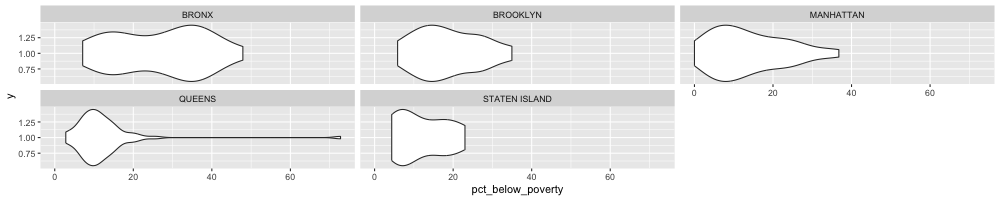

In [20]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() +
    facet_wrap(~ borough) 

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


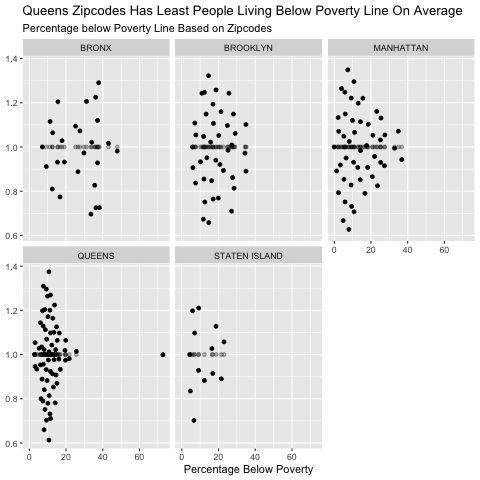

In [47]:
%%R
require('ggbeeswarm')

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_beeswarm(alpha=.3) +
    geom_quasirandom() +
    facet_wrap(~ borough) +
    labs(title = 'Queens Zipcodes Has Least People Living Below Poverty Line On Average',
         subtitle= 'Percentage below Poverty Line Based on Zipcodes',
       x = 'Percentage Below Poverty',
       y = NULL) 